Dataset:

https://www.kaggle.com/datasets/uciml/mushroom-classification/data

Data Dictionary:

Attribute Information: 

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scaling and pre processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# training and testing data split
from sklearn.model_selection import train_test_split

# nearest next neighbours
from sklearn.neighbors import KNeighborsClassifier

# decision tree
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn import metrics, svm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# import datasets
shrooms = pd.read_csv("mushrooms.csv")

Basic exploratory data analysis

In [3]:
shrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

8124 rows, 23 string columns that need encoding

In [5]:
# check for duplicates
uniquetestentries = shrooms.drop_duplicates()
uniquetestentries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

No duplicate entries.

In [6]:
# check for nulls
shrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No nulls

In [7]:
# Check numbers of types of string objects
for i in shrooms:
    data_type =  shrooms[i].dtype
    if data_type == "object":
        value_count = shrooms[i].value_counts()
        print("\n",value_count)


 class
e    4208
p    3916
Name: count, dtype: int64

 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

 cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

 bruises
f    4748
t    3376
Name: count, dtype: int64

 odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

 gill-attachment
f    7914
a     210
Name: count, dtype: int64

 gill-spacing
c    6812
w    1312
Name: count, dtype: int64

 gill-size
b    5612
n    2512
Name: count, dtype: int64

 gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

 stalk-shape
t    4608
e    3516
Name: count, dtype: int64

 stalk-root
b    3776
?    2480
e    1120
c     

Some biases in the data

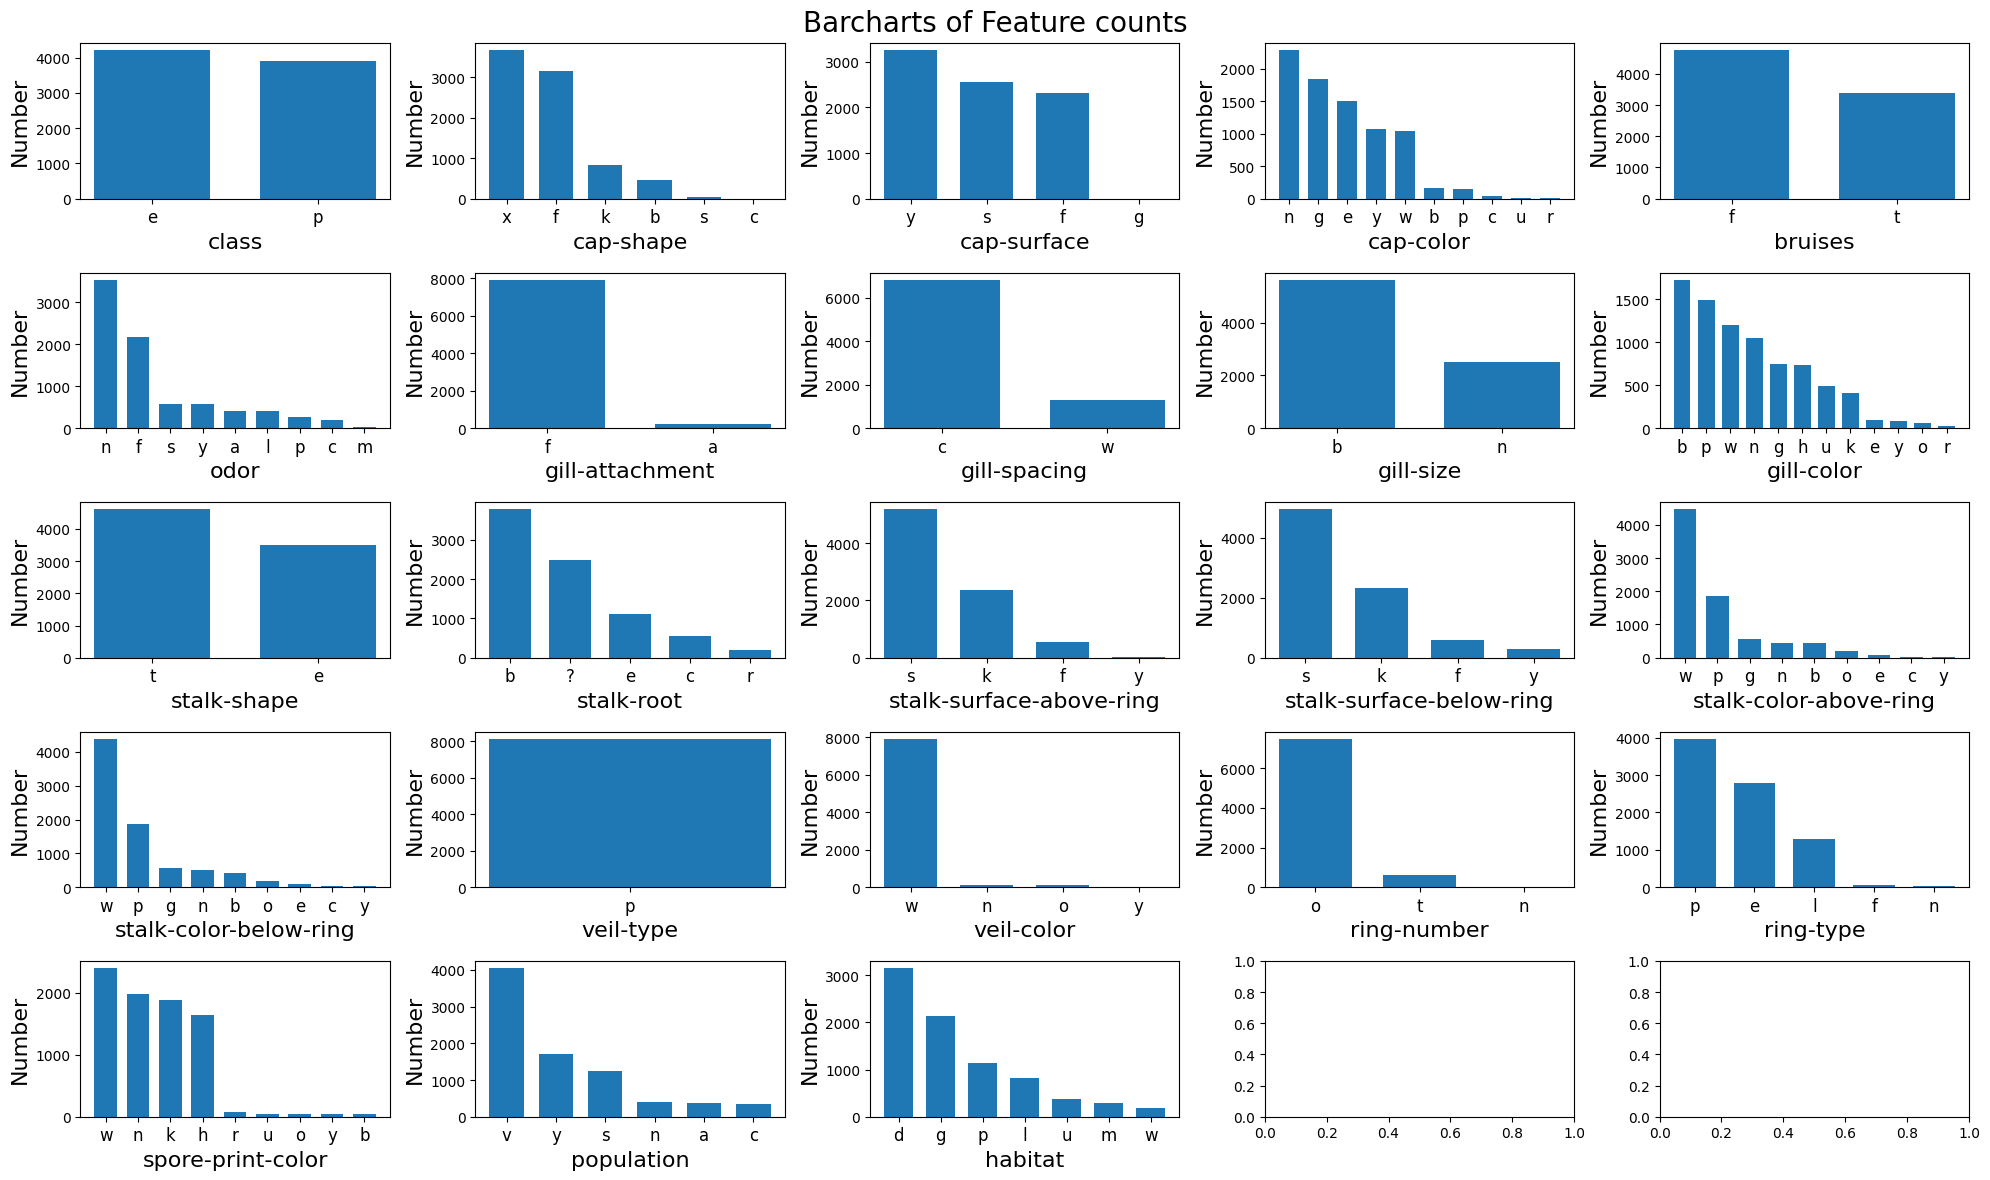

In [8]:
# Visualise numbers of types of string objects
width = 0.7 
mycols = 5
myrows = 5

fig, ax = plt.subplots(mycols, myrows, figsize=(20, 12))

row = 0
col = 0

for i in shrooms:
    data_type =  shrooms[i].dtype
    if data_type == "object":
        if col == mycols:
            col = 0
            row = row + 1
        value_count = shrooms[i].value_counts()
        value_labels = value_count.axes[0].tolist()
        ind = np.arange(len(value_labels))
        ax[row,col].bar(ind, value_count.values.tolist(), width)
        ax[row,col].set_xticks(ind)
        ax[row,col].set_xticklabels((value_labels),fontsize = 12)
        ax[row,col].set_xlabel(shrooms[i].name,fontsize=16)
        ax[row,col].set_ylabel('Number',fontsize=16)
        col = col + 1

plt.suptitle('Barcharts of Feature counts',fontsize=20)
plt.tight_layout()
filename = 'feature-barcharts.jpeg'
plt.savefig(filename, format = 'jpeg')

plt.show()


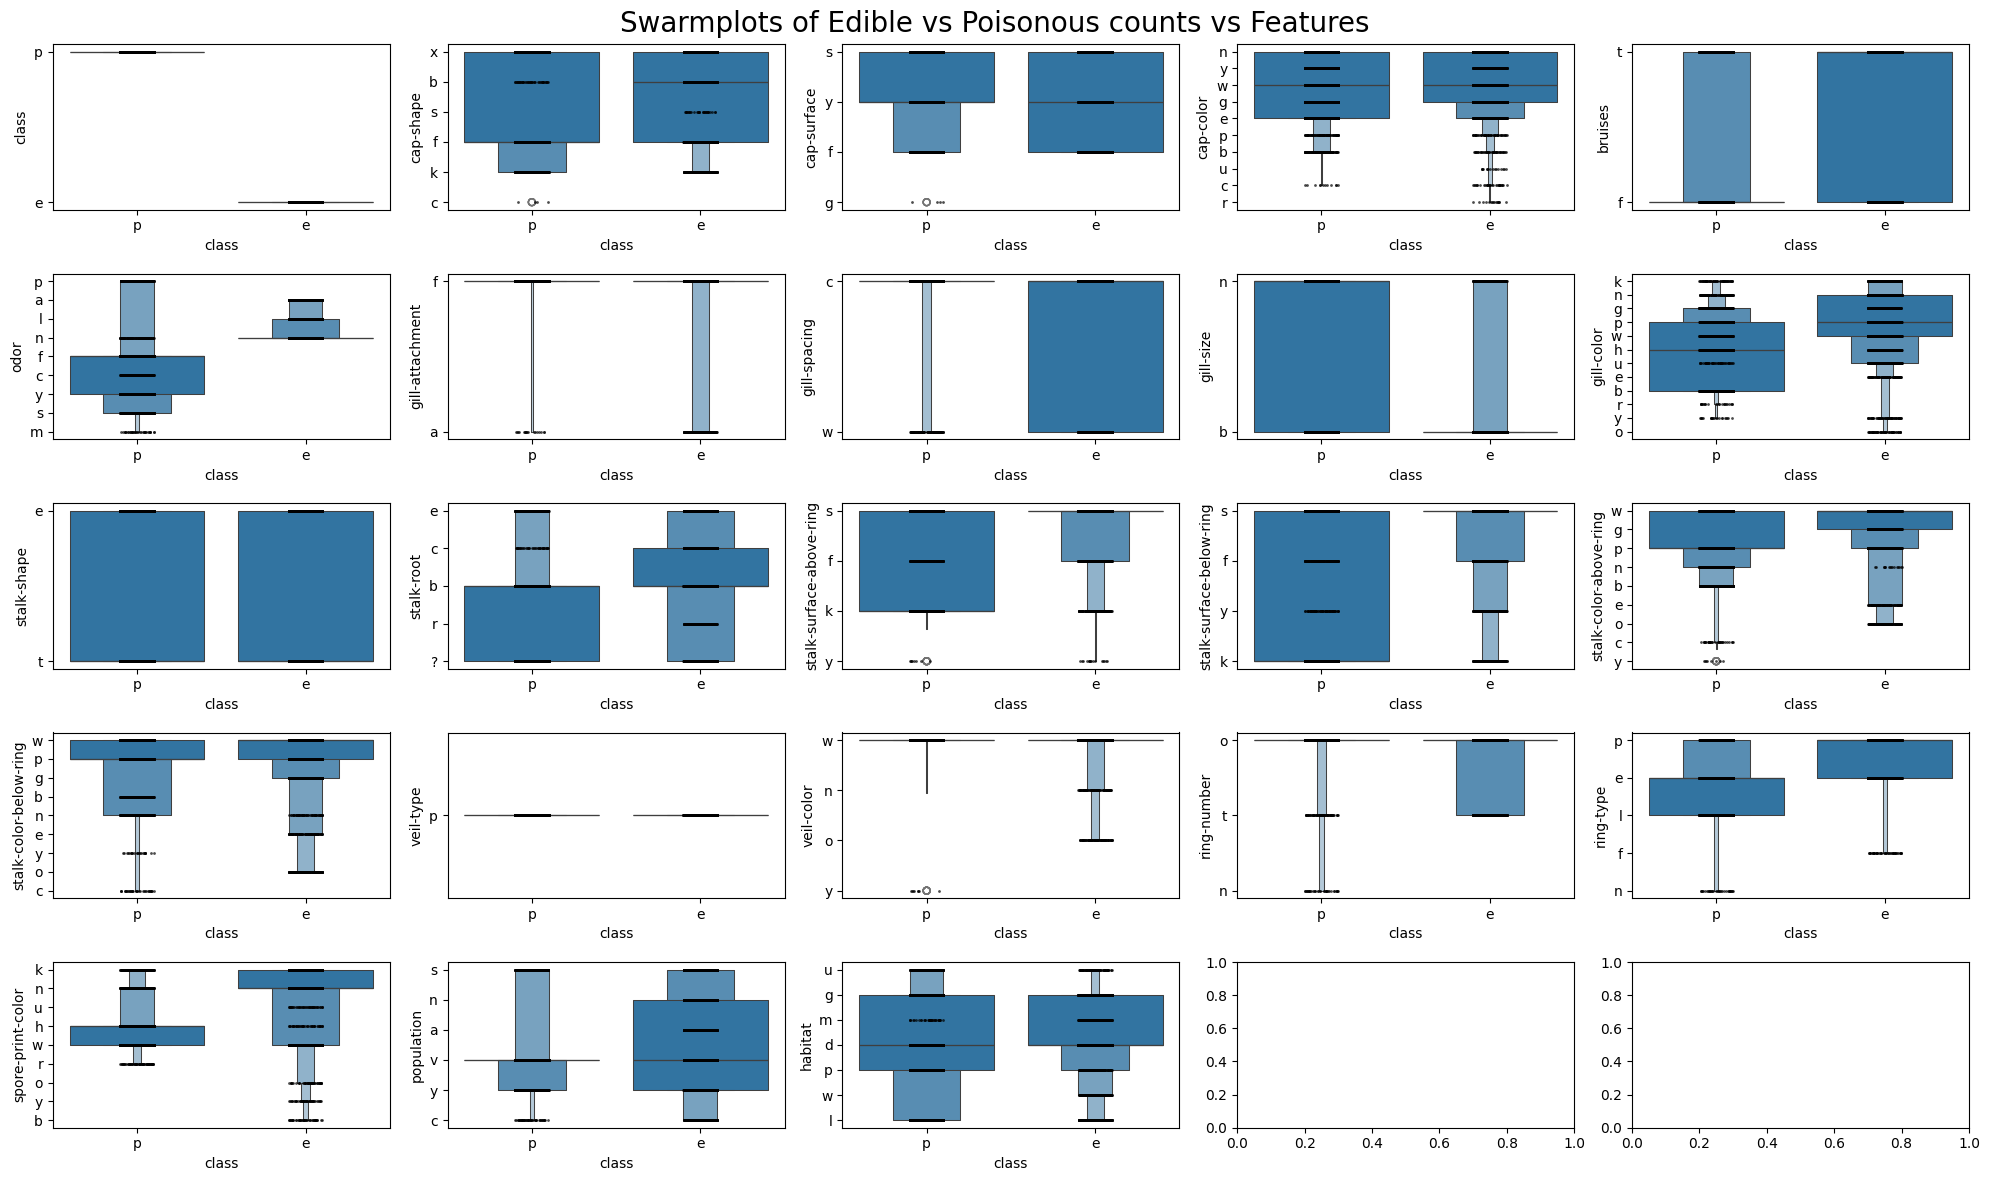

In [9]:
# Swarmplot with adjusted marker size and reduced overlap
fig, ax = plt.subplots(mycols, myrows, figsize=(20, 12))

row = 0
col = 0

for i in shrooms:
    data_type =  shrooms[i].dtype
    if data_type == "object":
        if col == mycols:
            col = 0
            row = row + 1
        sns.stripplot(ax=ax[row, col], x=shrooms['class'], y=shrooms[i], color="black", alpha=0.7, size=2) 
        sns.boxenplot(ax=ax[row, col], x=shrooms['class'], y=shrooms[i])
        col = col + 1

plt.suptitle('Swarmplots of Edible vs Poisonous counts vs Features',fontsize=20)
plt.tight_layout() 
filename = 'feature-swarmplots.jpeg'
plt.savefig(filename, format = 'jpeg')

plt.show()

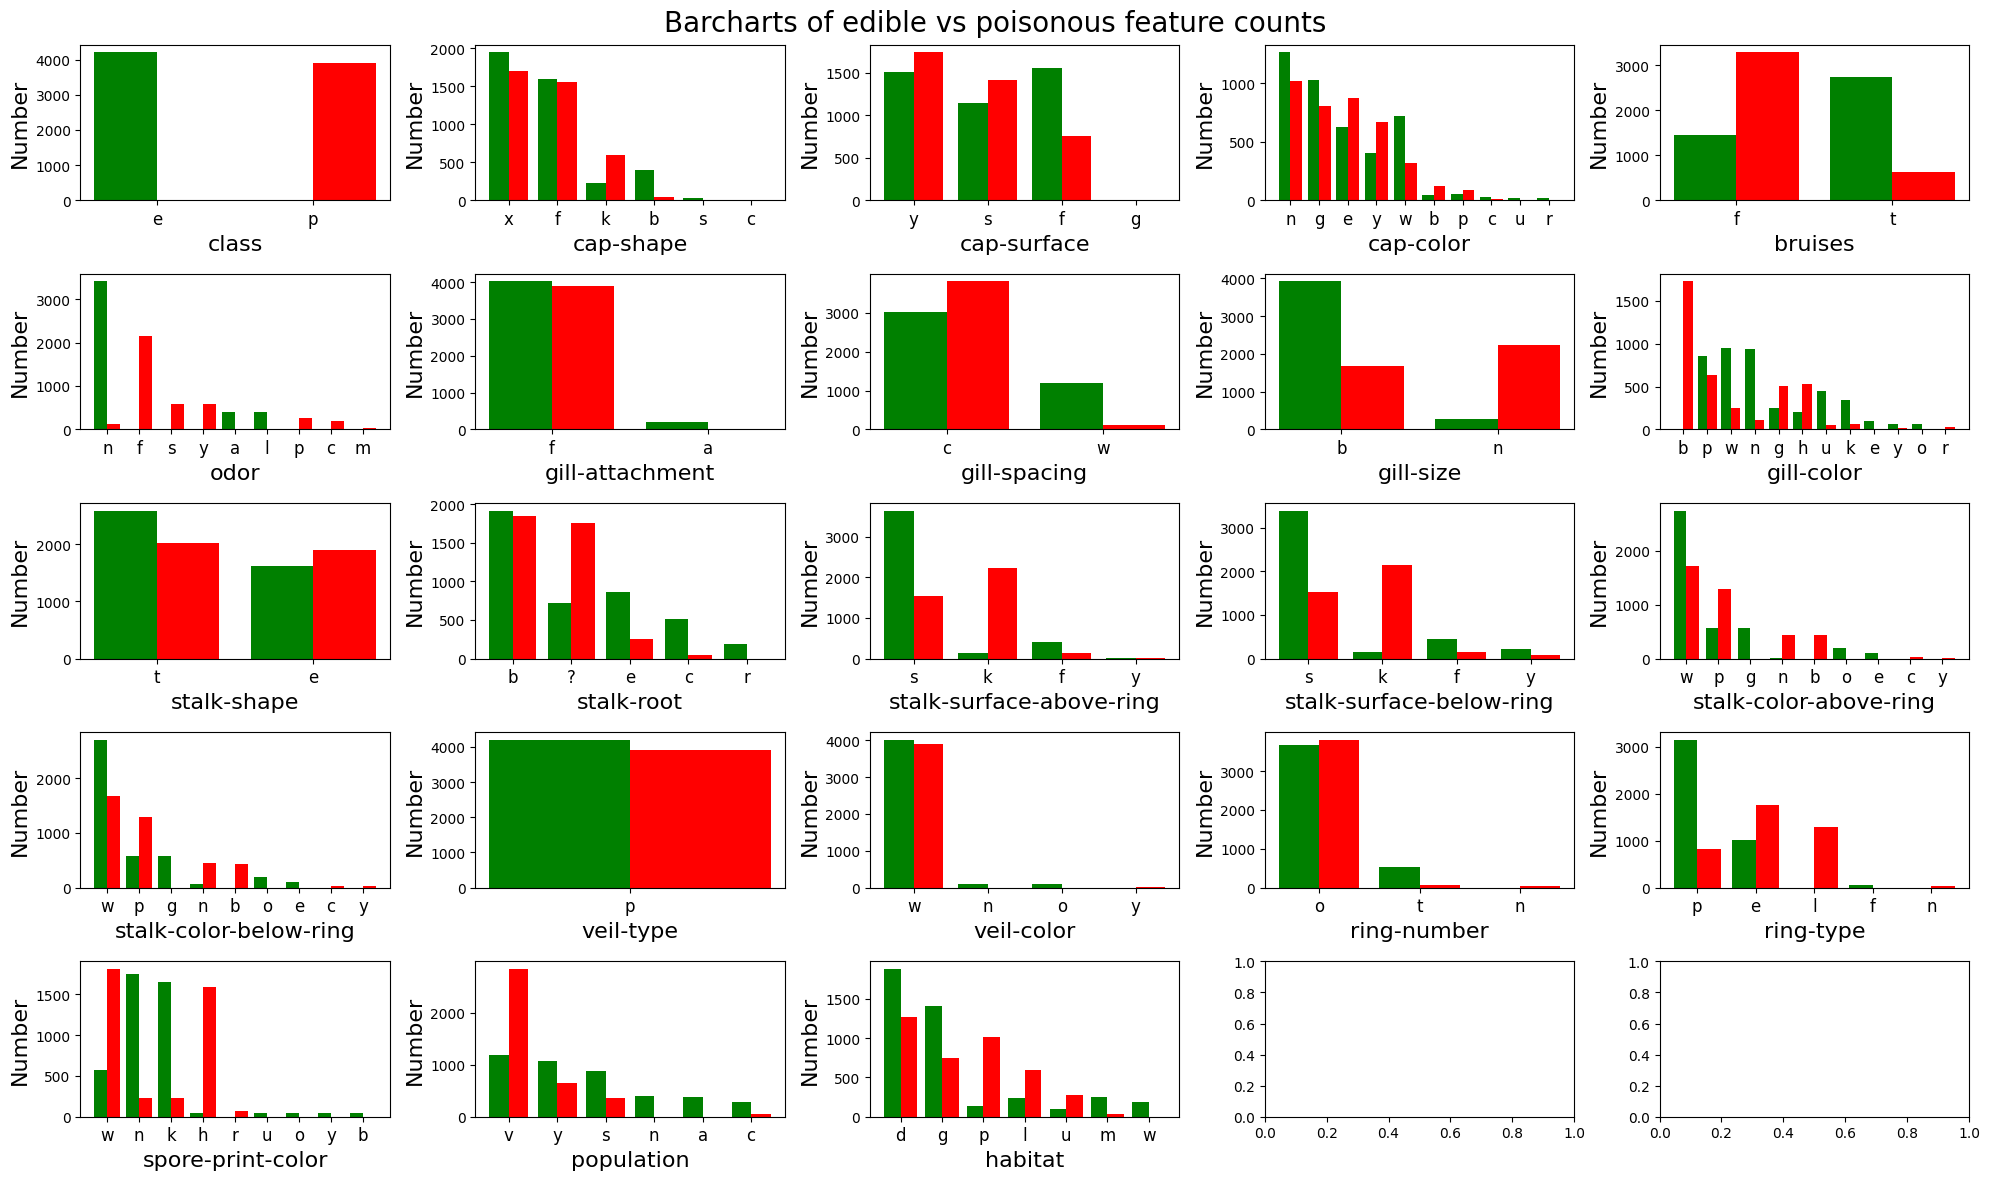

In [10]:
width = 0.4
mycols = 5
myrows = 5

fig, ax = plt.subplots(mycols, myrows, figsize=(20, 12)) 

row = 0
col = 0

for i in shrooms:
    data_type =  shrooms[i].dtype
    if data_type == "object":
        if col == mycols:
            col = 0
            row = row + 1
        value_count = shrooms[i].value_counts()
        value_labels = value_count.axes[0].tolist()
        ind = np.arange(len(value_labels))
        poisonous = [] 
        edible = [] 
        for j in value_labels:
            edibles = len(shrooms[(shrooms[i] == j) & (shrooms['class'] == 'e')].index)
            poisons = len(shrooms[(shrooms[i] == j) & (shrooms['class'] == 'p')].index)
            edible.append(edibles)
            poisonous.append(poisons)
        ax[row,col].bar(ind, edible , width, color='green')
        ax[row,col].bar(ind+width, poisonous , width, color='red')
        ax[row,col].set_xticks(ind + width / 2)
        ax[row,col].set_xticklabels((value_labels),fontsize = 12)
        ax[row,col].set_xlabel(shrooms[i].name,fontsize=16)
        ax[row,col].set_ylabel('Number',fontsize=16)
        col = col + 1

plt.suptitle('Barcharts of edible vs poisonous feature counts',fontsize=20)
plt.tight_layout() 
filename = 'ediblevspoisonous-barcharts.jpeg'
plt.savefig(filename, format = 'jpeg')

plt.show()


Most impactful features:

Bruising
True = less likely to be poisonous

Odor
Almond, anise are no poisonous. No odor also most likely not poisonous. Foul, fishy, musty, creosote, spicy certainly poisonous.

Gill-sizing
Broad - unlikely to be poisonous

Gill colour
White and brown unlikely to be poisonous, buff likely to be poisonous.

Stalk colour and texture also important

Useless fetures
Veil-Type - almost 50/50 distribution

In [11]:
shrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
## Prep independent variables x, and dependent variable y
x = shrooms.drop('class',axis=1)
y = shrooms['class']

In [13]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [14]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [15]:
# Clean the dataset

one_hot_enc = OneHotEncoder(sparse_output=False)
x_enc = one_hot_enc.fit_transform(x)

label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)

In [16]:
x_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y_enc

array([1, 0, 0, ..., 0, 1, 0])

In [18]:
# train test split 75% training, 25% testing
x_train, x_test, y_train, y_test = train_test_split(x_enc,y_enc,test_size=0.25, random_state=32)

In [19]:
## Models for decision tree

# Decision Tree
decision_tree_gini = DecisionTreeClassifier()

# using entropy criterion
decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

# train
decision_tree_gini.fit(x_train, y_train)
decision_tree_ent.fit(x_train, y_train)

# predict 
y_pred_gini = decision_tree_gini.predict(x_test)
y_pred_ent = decision_tree_ent.predict(x_test)

# measure accuracy by checking predicted y test vs actual y test
print("Accuracy of gini",metrics.accuracy_score(y_test,y_pred_gini))
print("Accuracy of entropy",metrics.accuracy_score(y_test,y_pred_ent))


Accuracy of gini 1.0
Accuracy of entropy 1.0


Accuracy of depth= 1  is:  0.8857705563761694
Accuracy of depth= 2  is:  0.9542097488921714
Accuracy of depth= 3  is:  0.9876907927129492
Accuracy of depth= 4  is:  0.9935992122107337
Accuracy of depth= 5  is:  0.9955686853766618
Accuracy of depth= 6  is:  1.0
Accuracy of depth= 7  is:  1.0
Accuracy of depth= 8  is:  1.0
Accuracy of depth= 9  is:  1.0
Accuracy of depth= 10  is:  1.0
Accuracy of depth= 11  is:  1.0


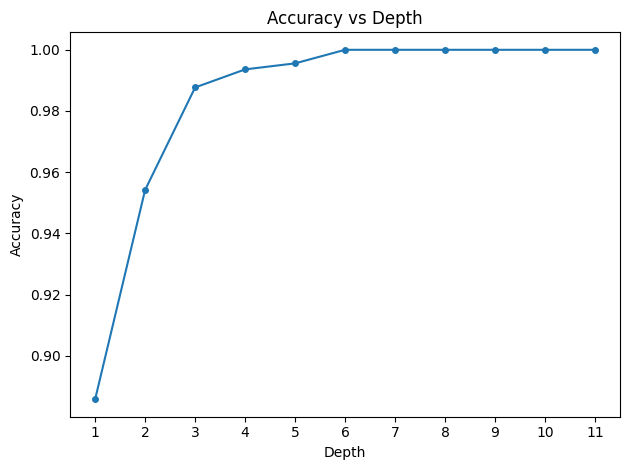

In [ ]:
# Find the smallest optimal max depth (max number of decisions)
dt_accuracy = []
i=1
while i < 12:
    decision_tree_depth = DecisionTreeClassifier(max_depth=i)
    decision_tree_depth.fit(x_train, y_train)
    y_pred_depth = decision_tree_depth.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,y_pred_depth)
    print("Accuracy of depth=",i," is: ",accuracy)
    dt_accuracy.append(accuracy)
    i = i+1

fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,12,1))
plt.plot(range(1,12,1),dt_accuracy, marker = 'o', markersize = 4)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.tight_layout()

filename = 'dtdepthaccuracy.jpeg'
plt.savefig(filename, format = 'jpeg')
plt.show()

Use depth = 6 as it gives 100% accuracy

In [21]:
decision_tree_depth = DecisionTreeClassifier(max_depth=6)
decision_tree_depth.fit(x_train, y_train)
y_pred_depth = decision_tree_depth.predict(x_test)

In [22]:
dfDecisionTreeTest = pd.DataFrame({'Actual': y_test, 'Gini': y_pred_gini,'Entropy': y_pred_ent,'Depth=6': y_pred_depth})
dfDecisionTreeTest

,Actual,Gini,Entropy,Depth=6
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2026,1,1,1,1
2027,1,1,1,1
2028,1,1,1,1
2029,0,0,0,0


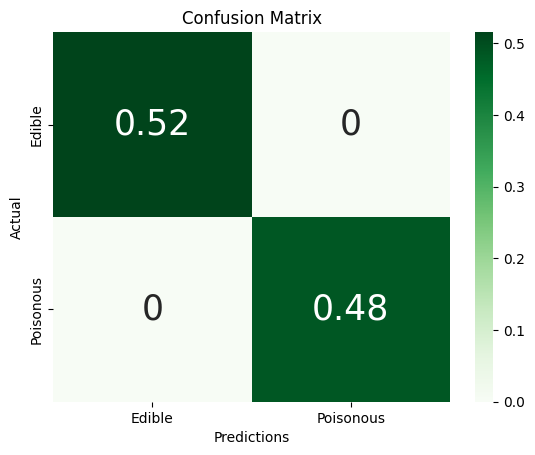

In [23]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_gini)
labels = ['Edible', 'Poisonous']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap='Greens',annot_kws = {'size':25}, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

filename = 'ConfusionMatrix-gini.jpeg'
plt.savefig(filename, format = 'jpeg')

plt.show()

AUC: 1.000000


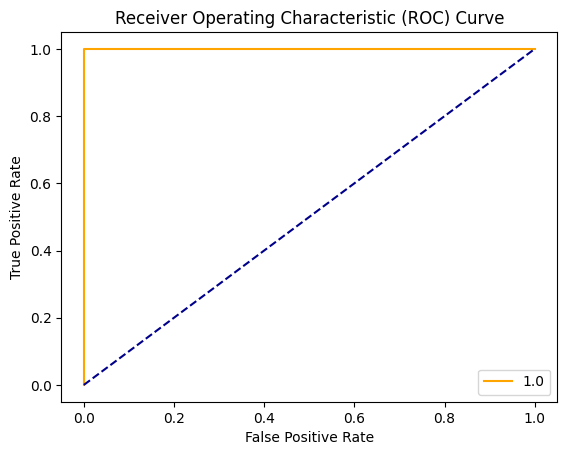

In [24]:
# AUC and ROC
auc = roc_auc_score(y_test, y_pred_gini)
print('AUC: %f' %auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_gini)

plt.plot(fpr, tpr, color='orange', label=auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

filename = 'ROCcurve.jpeg'
plt.savefig(filename, format = 'jpeg')

plt.show()

In [25]:
# SVM models
clflinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')


In [26]:
# SVM training
clflinear.fit(x_train,y_train)
clfsigmoid.fit(x_train,y_train)
clfrbf.fit(x_train,y_train)

# predict training
y_pred_lin = clflinear.predict(x_test)
y_pred_sig = clfsigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)

## measure accuracy
print("Accuracy of linear: ",metrics.accuracy_score(y_test,y_pred_lin))
print("Accuracy of sigmoid: ",metrics.accuracy_score(y_test,y_pred_sig))
print("Accuracy of rbf: ",metrics.accuracy_score(y_test,y_pred_rbf))



Accuracy of linear:  1.0
Accuracy of sigmoid:  0.967011324470704
Accuracy of rbf:  1.0


In [27]:
dfSVMTest = pd.DataFrame({'Actual': y_test, 'Linear':y_pred_lin,'Sigmoid':y_pred_sig,'RBF':y_pred_rbf})
dfSVMTest

,Actual,Linear,Sigmoid,RBF
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2026,1,1,1,1
2027,1,1,1,1
2028,1,1,1,1
2029,0,0,0,0


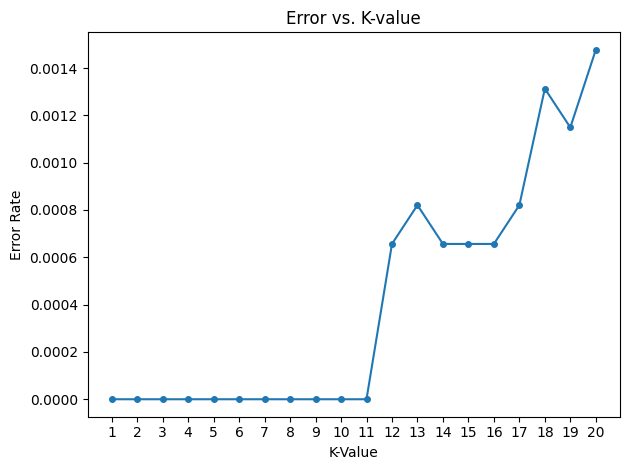

In [ ]:
# what is the best k value for KNN using standard scaler?
error_rate = []
maxnum = 21

# loop around possible k values from 1 to number of data points in x_train, only using odd values
for i in range(1,maxnum,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_train)
    error_rate.append(np.mean(knn_pred != y_train))

fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,maxnum,1))
plt.plot(range(1,maxnum,1),error_rate, marker = 'o', markersize = 4)
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.title('Error vs. K-value')
plt.tight_layout()
filename = 'knn-short-sc.jpeg'
plt.savefig(filename, format = 'jpeg')


We're going to use 2 anyway as it's edible or poisonous, but it's always fun to see what KNN would be happy with

In [29]:
# build the model knn = 2 as it's a binary outcome
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)

# predict
knn_pred = knn.predict(x_test)
print("Accuracy of knn: ",metrics.accuracy_score(y_test,knn_pred))


Accuracy of knn:  1.0


In [30]:
dfKNNTest = pd.DataFrame({'Actual': y_test, 'KNN':knn_pred})
dfKNNTest

,Actual,KNN
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
2026,1,1
2027,1,1
2028,1,1
2029,0,0
